In [1]:
from pycalphad import Database, Model, variables as v

In [2]:
from pycalphad import equilibrium
import numpy as np

TDB = """
 ELEMENT A    GRAPHITE                   12.011     1054.0      5.7423 !
 ELEMENT B   BCC_A2                     55.847     4489.0     27.2797 !
 TYPE_DEFINITION % SEQ * !
 PHASE TEST % 1 1 !
 CONSTITUENT TEST : A,B: !
"""

my_phases_rose = ['TEST']
comps = ['A', 'B']#, 'LI', 'BE', 'B', 'C', 'N', 'O', 'F']
comps = sorted(comps)
conds = dict({v.T: 1000, v.P: 101325})
#for comp in comps[1:]:
#    conds[v.X(comp)] = 1.0/float(len(comps))
conds[v.MU('B')] = -1855.3270574019966
#conds[v.X('A')] = 0.8
dbf = Database(TDB)
eqx = equilibrium(Database(TDB), comps, my_phases_rose, conds, calc_opts={'pdens': 10}, verbose=True)

Components: A B
Phases: TEST [done]


/home/rotis/anaconda/envs/calphadpy3/lib/python3.5/site-packages/dask/base.py:835: UserWarning: The get= keyword has been deprecated. Please use the scheduler= keyword instead with the name of the desired scheduler like 'threads' or 'processes'
  warnings.warn("The get= keyword has been deprecated. "


('Redundant phase:', CompositionSet(TEST, [ 0.44444444  0.55555556], NP=1.0, GM=-5711.742028618652))
Removing CompositionSet(TEST, [ 0.44444444  0.55555556], NP=nan, GM=-5711.742028618652)
('cur_conds', OrderedDict([('MU_B', array(-1855.3270574019966)), ('N', array(1.0)), ('P', array(101325.0)), ('T', array(1000.0))]))
('fixed_statevars', [('N', array(1.0)), ('P', array(101325.0)), ('T', array(1000.0))])
(array([1], dtype=int32), array([-1855.3270574]))
('prob.x0', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   2.00000000e+00]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   2.00000000e+00]))
('total_obj', -9774.304450657339)
('gradient', array([  0.00000000e+00,   0.00000000e+00,  -1.14234841e+01,
         1.66290000e+04,   1.66290000e+04,  -4.88715223e+03]))
('x_in', array([  1.00000001e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.444

         5.55555556e-01,   4.44444444e-01,   1.00000000e+00]))
('total_obj', -4887.152225328669)
('gradient', array([  0.00000000e+00,   0.00000000e+00,  -5.71174203e+00,
         8.31450000e+03,   8.31450000e+03,  -4.88715223e+03]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   1.00000000e+00]))
('total_obj', -4887.152225328669)
('gradient', array([  0.00000000e+00,   0.00000000e+00,  -5.71174203e+00,
         8.31450000e+03,   8.31450000e+03,  -4.88715223e+03]))
('gradient', array([  0.00000000e+00,   0.00000000e+00,  -5.71174203e+00,
         8.31450000e+03,   8.31450000e+03,  -4.88715223e+03]))
Chemical Potentials [-4887.15222533 -4887.15222533]
[  5.00000000e-16   4.93461633e-21   5.00000000e-19   9.00000000e-16
   1.12500000e-15   5.00000500e-16]
[  1.00000000e+00   1.01325000e+05   1.00000000e+03   5.55555556e-01
   4.44444444e-01   1.00000000e+00]
Status: 0 b'Algorithm terminated successfully at a locally opti

In [3]:
eqx.MU

<xarray.DataArray 'MU' (N: 1, P: 1, T: 1, MU_B: 1, component: 2)>
array([[[[[-4887.152225, -4887.152225]]]]])
Coordinates:
  * MU_B       (MU_B) float64 -1.855e+03
  * N          (N) float64 1.0
  * P          (P) float64 1.013e+05
  * T          (T) float64 1e+03
  * component  (component) <U1 'A' 'B'

In [4]:
eqx.X

<xarray.DataArray 'X' (N: 1, P: 1, T: 1, MU_B: 1, vertex: 2, component: 2)>
array([[[[[[ 0.555556,  0.444444],
           [      nan,       nan]]]]]])
Coordinates:
  * MU_B       (MU_B) float64 -1.855e+03
  * N          (N) float64 1.0
  * P          (P) float64 1.013e+05
  * T          (T) float64 1e+03
  * vertex     (vertex) int64 0 1
  * component  (component) <U1 'A' 'B'

In [5]:
eqx.Y

<xarray.DataArray 'Y' (N: 1, P: 1, T: 1, MU_B: 1, vertex: 2, internal_dof: 2)>
array([[[[[[ 0.555556,  0.444444],
           [      nan,       nan]]]]]])
Coordinates:
  * MU_B     (MU_B) float64 -1.855e+03
  * N        (N) float64 1.0
  * P        (P) float64 1.013e+05
  * T        (T) float64 1e+03
  * vertex   (vertex) int64 0 1
Dimensions without coordinates: internal_dof

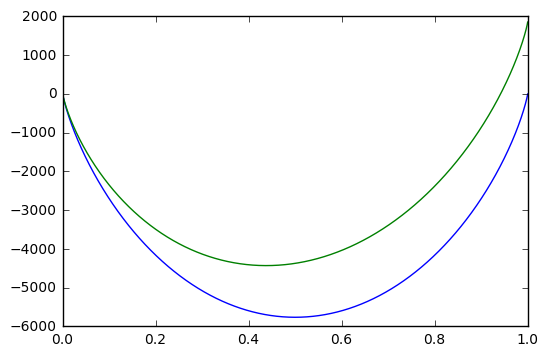

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1e-9,1-1e-9,2000)
gm = 8314.5*(np.log(x)*x + (1-x)*np.log(1-x))
ac = 0.8
mu = 8314.5*np.log(ac)
jac = np.array([[1, 0], [0, -1]])
trans_func = gm - mu*x * (1 + 1-x)

plt.plot(x,gm, label='GM')
plt.plot(x, trans_func, label='L')

In [68]:
np.exp(-1855.3270574019966/8314.5)

0.80000000000000004

In [69]:
x[np.argmin(trans_func)]

0.43771885955427725

In [9]:
8314.5*np.log(0.8)

-1855.3270574019966

In [43]:
np.gradient(gm - mu*x)

array([-34.84262295, -31.95861028, -27.98537666, ...,  29.84163184,
        33.81486546,  36.69887813])

In [47]:
(8314.5*(1 - x - (1-x)*np.log(1-x)))[np.argmin(trans_func)]

4340.5729411452421

In [35]:
(gm - 0.8*-1855.3270574019966)[np.argmin(trans_func)]

-2677.4872624934956

In [36]:
4340.5729411452439-2677.4872624934956

1663.0856786517484